In [1]:
!pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.2.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 10.7 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [6]:
# Read each line of the file and store it as an item in a list
lines_as_list = []
with open('/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/runs.metadata', 'r') as file:
    for line in file:
        lines_as_list.append(line.strip())  # Use strip() to remove leading/trailing whitespace

# Print the list of lines
print(f"Total lines: {len(lines_as_list)}")
print(lines_as_list[:10])  # Print the first 10 lines for inspection


Total lines: 24
['2025-01-06 23:49:24.064839 | run-1 | gpt-3.5 | 20 subjects | Experiment 1/3 w/ 20 subjects and 3.5 using standard profit maximizing prompt + fixed auto timeout take 2 | hrei2bal', '2025-01-07 10:56:18.560119 | run-2 | gpt-3.5 | 20 subjects | Experiment 2/3 w/ 20 subjects and 3.5 using standard profit maximizing prompt + fixed auto timeout take 2 | ne4pwggz', '2025-01-07 19:11:15.278792 | run-3 | gpt-3.5 | 20 subjects | Experiment 3/3 w/ 20 subjects and 3.5 using standard profit maximizing prompt + fixed auto timeout take 2 | lwnwomh2', '2025-01-07 20:56:24.718525 | run-4 | gemini-1.5-pro | 20 subjects | Experiment 1/3 w/ 20 subjects and gemini-1.5-pro using standard profit maximizing prompt (paused due to evac) | yy9pw5g4', '2025-01-09 23:25:43.977014 | run-5 | gemini-1.5-pro | 20 subjects | Experiment 1/3 w/ 20 subjects and gemini-1.5-pro using standard profit maximizing prompt | 1vpzr064', '2025-01-10 01:10:52.342729 | run-6 | gemini-1.5-pro | 20 subjects | Experime

In [21]:
agent_runs = {}

# Iterate through the list
for line in lines_as_list:
    parts = line.split('|')  # Split by the '|' delimiter
    run_number = parts[1].strip()  # Extract the run number
    agent_name = parts[2].strip()  # Extract the agent name

    # Add the run number to the list for the agent
    if agent_name not in agent_runs:
        agent_runs[agent_name] = []
    agent_runs[agent_name].append(run_number)

# Print the resulting dictionary
print(agent_runs)

{'gpt-3.5': ['run-1', 'run-2', 'run-3'], 'gemini-1.5-pro': ['run-4', 'run-5', 'run-6', 'run-7'], 'gpt-4o': ['run-8', 'run-9', 'run-10'], 'mistral-large': ['run-11', 'run-12', 'run-13'], 'grok-2': ['run-14', 'run-15', 'run-16', 'run-17', 'run-18'], 'claude-3.5-sonnet': ['run-19', 'run-20', 'run-21'], 'mixed': ['run-22', 'run-23', 'run-24']}


In [31]:
for run in agent_runs['gemini-1.5-pro']:
    print(run)

run-4
run-5
run-6
run-7


In [37]:
dir = rf'/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs'
# Loop through the agents in agent_runs
for agent in agent_runs.keys():
    
    # Transform the list of runs into a dictionary
    runs = agent_runs[agent]  # Get the list of runs
    agent_runs[agent] = {}  # Replace it with an empty dictionary
    
    # Iterate through the runs for each agent
    for run in runs:
        
        # Construct the file path
        agent_path = rf"{dir}/{run}/all-rounds-compressed.json"
        
        # Assign the path to the run
        agent_runs[agent][run] = agent_path

# Print the final agent_runs dictionary to verify
print(agent_runs)


{'gpt-3.5': {'run-1': '/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-1/all-rounds-compressed.json', 'run-2': '/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-2/all-rounds-compressed.json', 'run-3': '/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-3/all-rounds-compressed.json'}, 'gemini-1.5-pro': {'run-4': '/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-4/all-rounds-compressed.json', 'run-5': '/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-5/all-rounds-compressed.json', 'run-6': '/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-6/all-rounds-compressed.json', 'run-7': '/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-7/all-rounds-compressed.json'}, 'gpt-4o': {'run-8': '/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-8/all-rounds-compressed.js

In [214]:
agent_runs['gpt-3.5']['run-1']

'/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-1/all-rounds-compressed.json'

In [215]:
import json
import os

# Define the paths to your JSON files
file_paths = [
    '/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-1/all-rounds-compressed.json'
]

# Function to load JSON data
def load_json_files(paths):
    json_data = {}
    for path in paths:
        if os.path.exists(path):  # Check if the file exists
            try:
                with open(path, 'r') as file:
                    json_data[path] = json.load(file)  # Load JSON content
            except json.JSONDecodeError as e:  # Handle invalid JSON
                json_data[path] = f"Error decoding JSON: {e}"
        else:
            json_data[path] = f"File not found: {path}"
    return json_data

# Load the JSON files
loaded_data = load_json_files(file_paths)

# # Print a summary of the loaded data
# for path, content in loaded_data.items():
#     if isinstance(content, str):  # Handle errors and file-not-found cases
#         print(f"{path}: {content}")
#     else:
#         print(f"{path}: Successfully loaded. Keys: {list(content.keys())}")




In [220]:
loaded_data['/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-1/all-rounds-compressed.json']['Round 30'][0]['portfolio_state']

{'num_shares': 4,
 'current_cash': 604.18,
 'stock_value': 92.0,
 'dividend_earned': 4.0,
 'interest_earned': 28.58,
 'submitted_orders': [{'order_type': 'BUY', 'num_shares': 2, 'price': 21.0},
  {'order_type': 'SELL', 'num_shares': 1, 'price': 28.0}],
 'executed_trades': [],
 'round_finished': True}

In [83]:
def calculate_port_val(loaded_data, round):
    round_30_data = loaded_data['/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/run-1/all-rounds-compressed.json'][f'Round {round}']

    port_val_list = []
    for i in range(20):
        port_val = round_30_data[i]['portfolio_state']['current_cash'] +round_30_data[i]['portfolio_state']['stock_value']
        port_val_list.append(port_val)
    return port_val_list
port_val_list = calculate_port_val(loaded_data, 30)
port_val_list

[696.18,
 712.03,
 682.48,
 684.28,
 696.48,
 702.97,
 704.6,
 691.79,
 696.18,
 705.16,
 696.18,
 702.54,
 696.33,
 698.55,
 650.31,
 700.9,
 696.96,
 697.22,
 696.18,
 715.96]

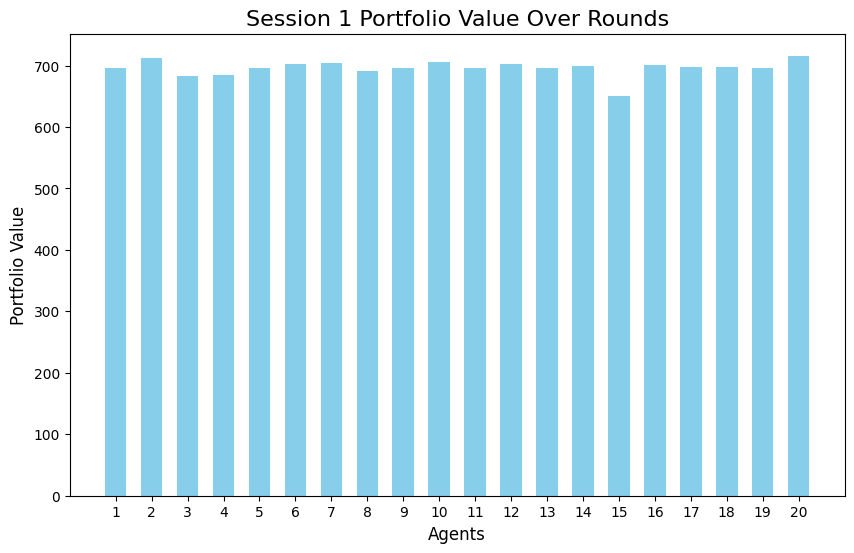

In [84]:
import matplotlib.pyplot as plt
session = 1
dir_path = rf"/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs"
model = 'GPT4o'
def plot_final_port_val(session, model, port_val_list, dir_path):
    # Generate bar indices
    indices = list(range(1, len(port_val_list) + 1))

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(indices, port_val_list, color='skyblue', width=0.6)

    # Add titles and labels
    plt.title(f"{model} Session {1} Portfolio Value Over Rounds", fontsize=16)
    plt.xlabel("Agents", fontsize=12)
    plt.ylabel("Portfolio Value", fontsize=12)
    plt.xticks(indices)  # Set x-ticks to the round numbers


    # Show the plot
    plt.savefig(fr"{dir_path}/{model}_{session}_final_portfolio_values.png")

    plt.show()
plot_final_port_val(session,model, port_val_list, dir_path)

# Put it all together

## Functions

In [221]:
def plot_final_port_val(session, model, port_val_list, dir_path):
    # Generate bar indices
    indices = list(range(1, len(port_val_list) + 1))

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(indices, port_val_list, color='skyblue', width=0.6)

    # Add titles and labels
    plt.title(f"{model} Session {session} Portfolio Value Over Rounds", fontsize=16)
    plt.xlabel("Agents", fontsize=12)
    plt.ylabel("Portfolio Value", fontsize=12)
    plt.xticks(indices)  # Set x-ticks to the round numbers

    output_dir = fr"{dir_path}/{model}/graphs"

    # Check if the directory exists; if not, create it
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Show the plot
    plt.savefig(fr"{output_dir}/{model}_{session}_final_portfolio_values.png")
    print("Image saved to ",output_dir )
    plt.show()

def calculate_port_val(loaded_data, round, run):
    print(run)
    round_30_data = loaded_data[f'/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/{run}/all-rounds-compressed.json'][f'Round {round}']

    port_val_list = []
    for i in range(20):
        port_val = round_30_data[i]['portfolio_state']['current_cash'] +round_30_data[i]['portfolio_state']['num_shares'] * 14
        port_val_list.append(port_val)
    return port_val_list

def load_json_files(path):
    json_data = {}
    if os.path.exists(path):  # Check if the file exists
        try:
            with open(path, 'r') as file:
                json_data[path] = json.load(file)  # Load JSON content
        except json.JSONDecodeError as e:  # Handle invalid JSON
            json_data[path] = f"Error decoding JSON: {e}"
    else:
        json_data[path] = f"File not found: {path}"
    return json_data


def get_lines_of_file(metadata):
    lines_as_list = []
    with open(metadata, 'r') as file:
        for line in file:
            lines_as_list.append(line.strip())  # Use strip() to remove leading/trailing whitespace
    return lines_as_list

def get_runs(lines_as_list):
    agent_runs = {}

    # Iterate through the list
    for line in lines_as_list:
        parts = line.split('|')  # Split by the '|' delimiter
        run_number = parts[1].strip()  # Extract the run number
        agent_name = parts[2].strip()  # Extract the agent name

        # Add the run number to the list for the agent
        if agent_name not in agent_runs:
            agent_runs[agent_name] = []
        agent_runs[agent_name].append(run_number)
    return agent_runs

def link_run_data(agent_runs, run_dir):
    # Print the resulting dictionary
    # Loop through the agents in agent_runs
    for agent in agent_runs.keys():
        
        # Transform the list of runs into a dictionary
        runs = agent_runs[agent]  # Get the list of runs
        agent_runs[agent] = {}  # Replace it with an empty dictionary
        
        # Iterate through the runs for each agent
        for run in runs:
            
            # Construct the file path
            agent_path = rf"{run_dir}/{run}/all-rounds-compressed.json"
            
            # Assign the path to the run
            agent_runs[agent][run] = agent_path

    # Print the final agent_runs dictionary to verify
    return (agent_runs)

## Modeling

In [222]:

# Read each line of the file and store it as an item in a list
metadata = r"/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs/runs.metadata"

lines_as_list = get_lines_of_file(metadata)
agent_runs = get_runs(lines_as_list)
run_dir = rf'/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/real-experiment-runs'
agent_runs_dict = link_run_data(agent_runs, run_dir)


gpt-3.5
run-1
run-1
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/gpt-3.5/graphs


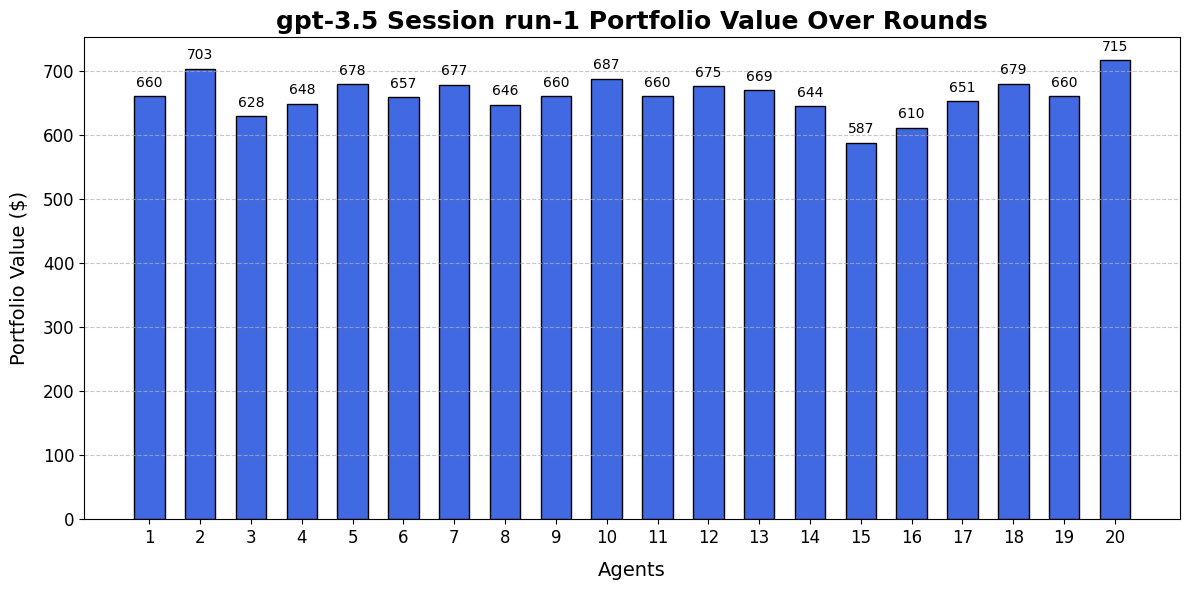

run-2
run-2
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/gpt-3.5/graphs


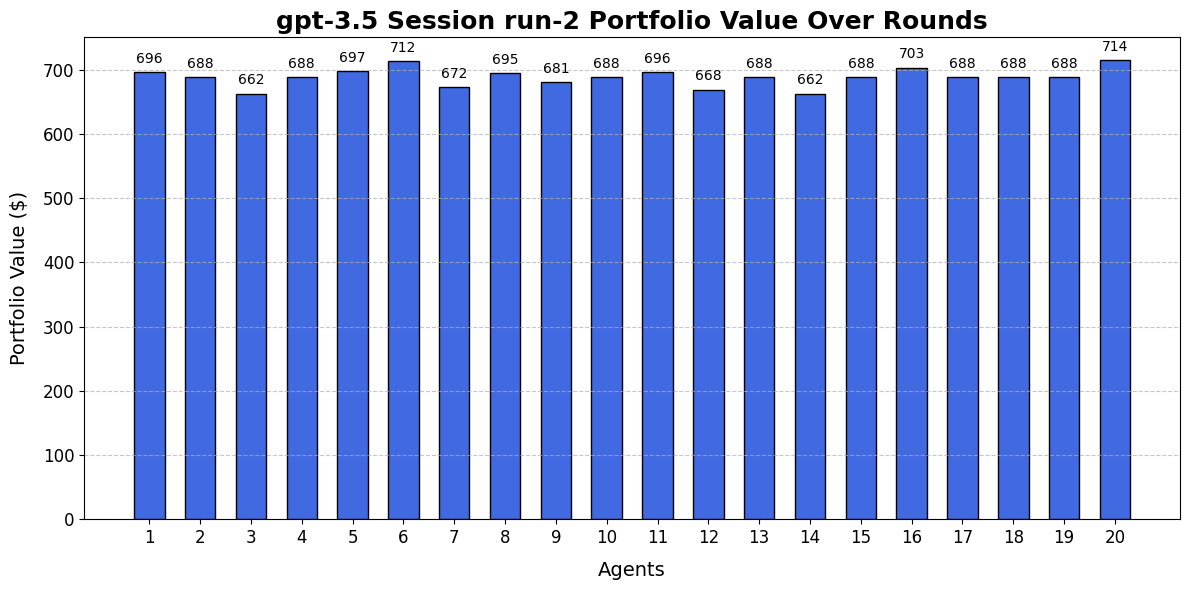

run-3
run-3
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/gpt-3.5/graphs


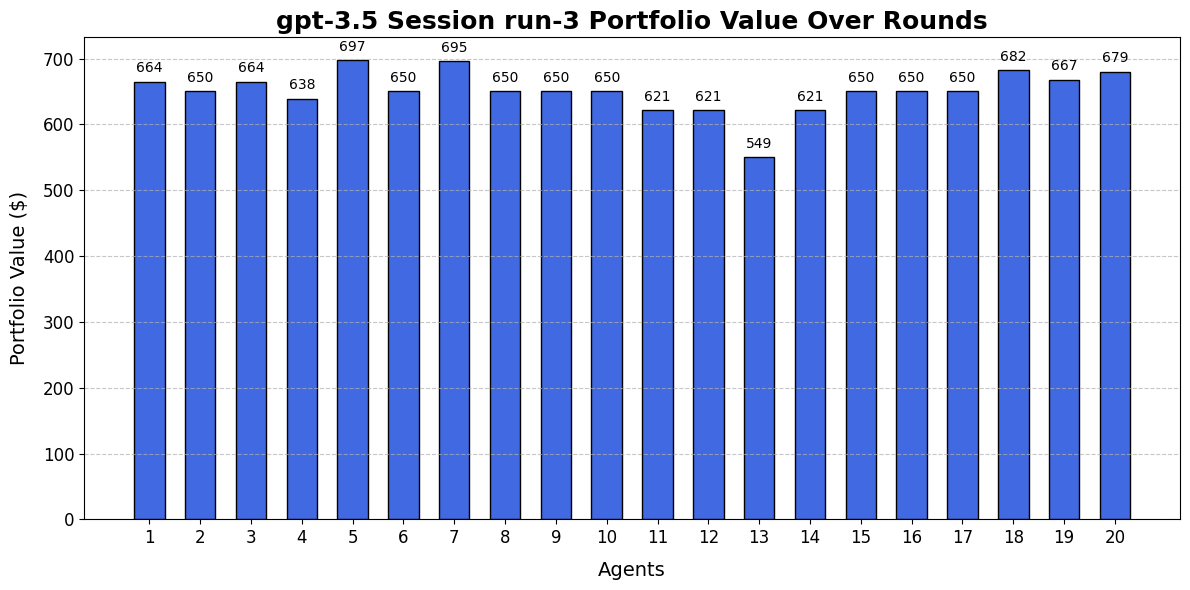

gemini-1.5-pro
run-4
run-4
Skipping session run-4 for model gemini-1.5-pro due to missing 'Round 30'
run-5
run-5
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/gemini-1.5-pro/graphs


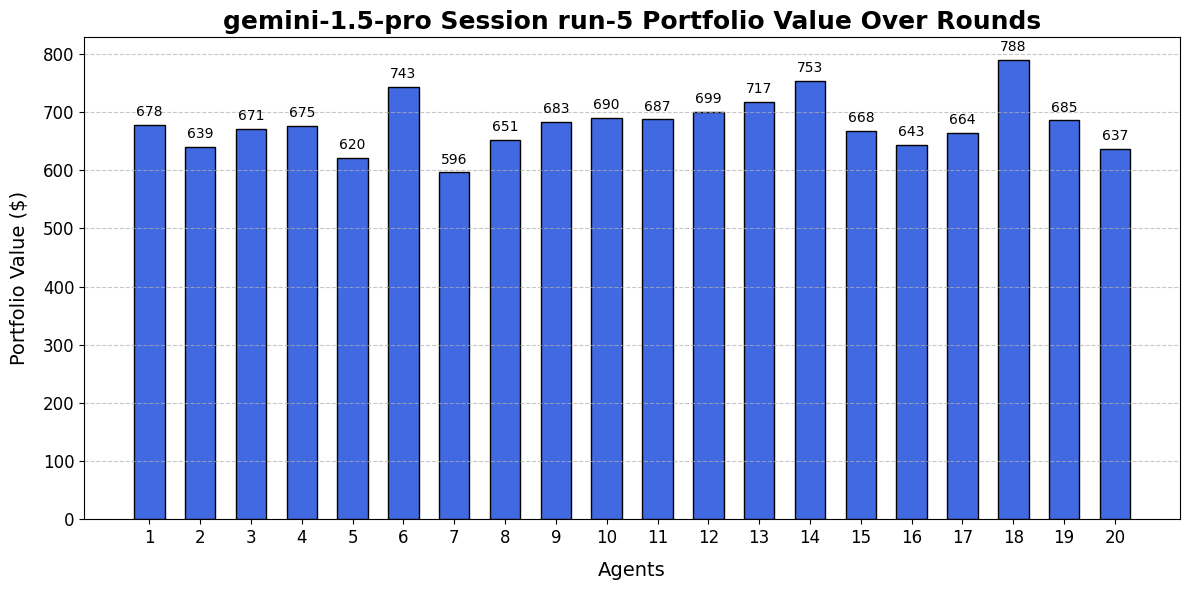

run-6
run-6
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/gemini-1.5-pro/graphs


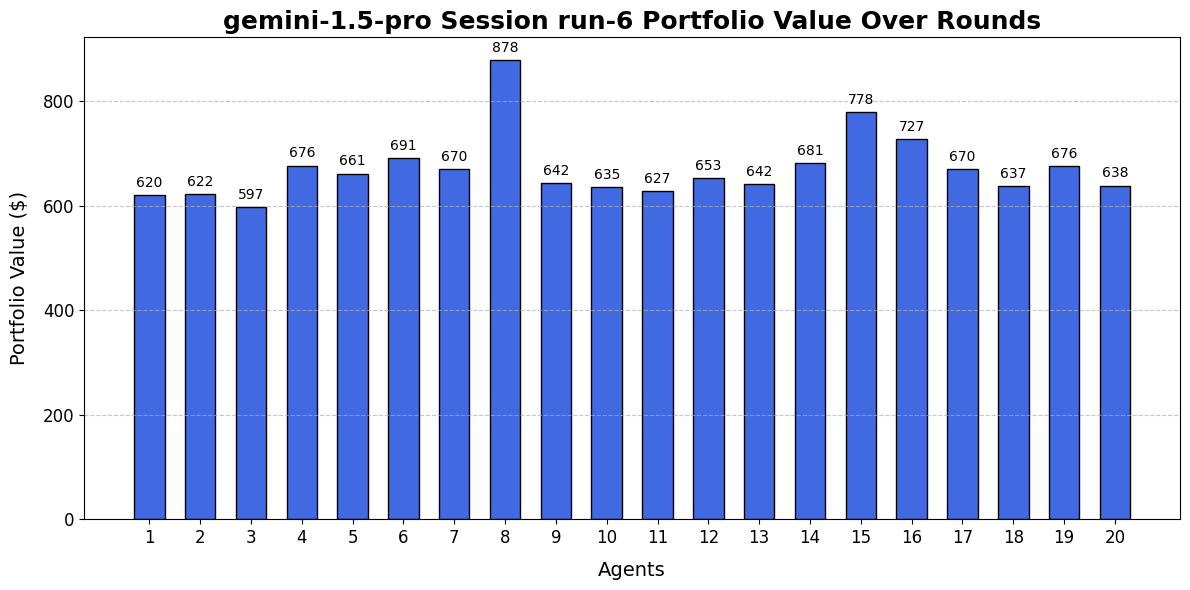

run-7
run-7
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/gemini-1.5-pro/graphs


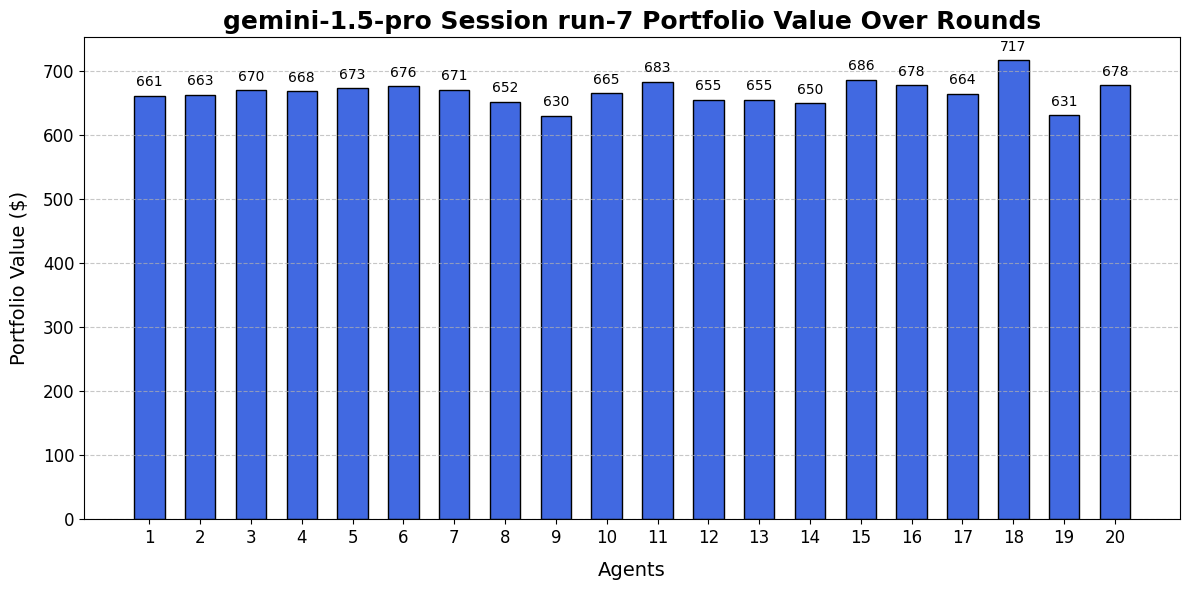

gpt-4o
run-8
run-8
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/gpt-4o/graphs


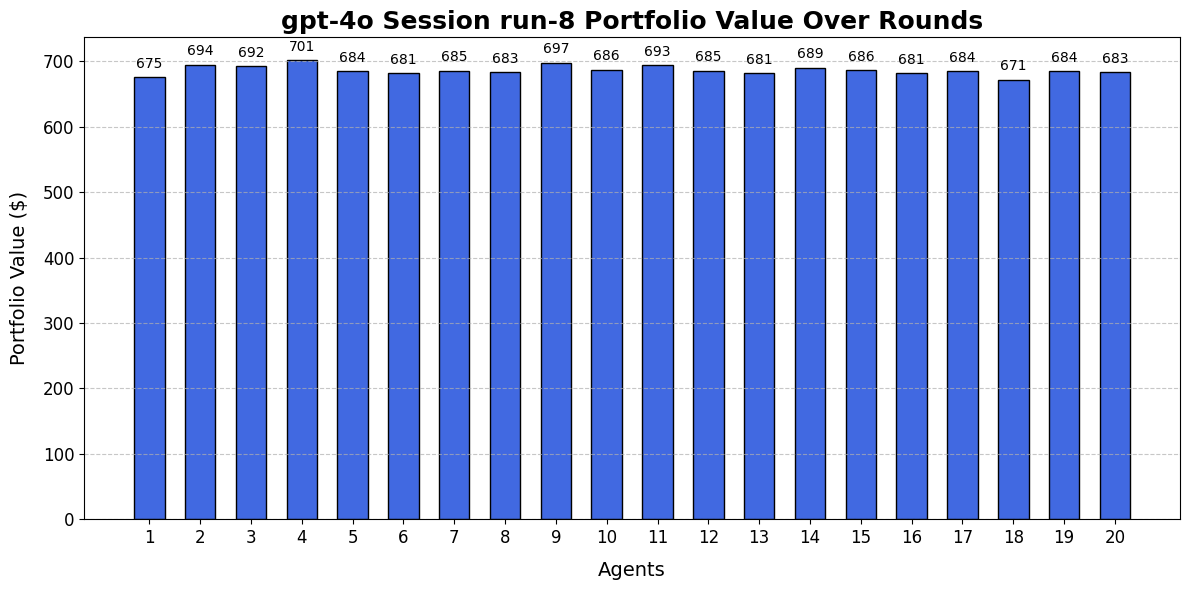

run-9
run-9
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/gpt-4o/graphs


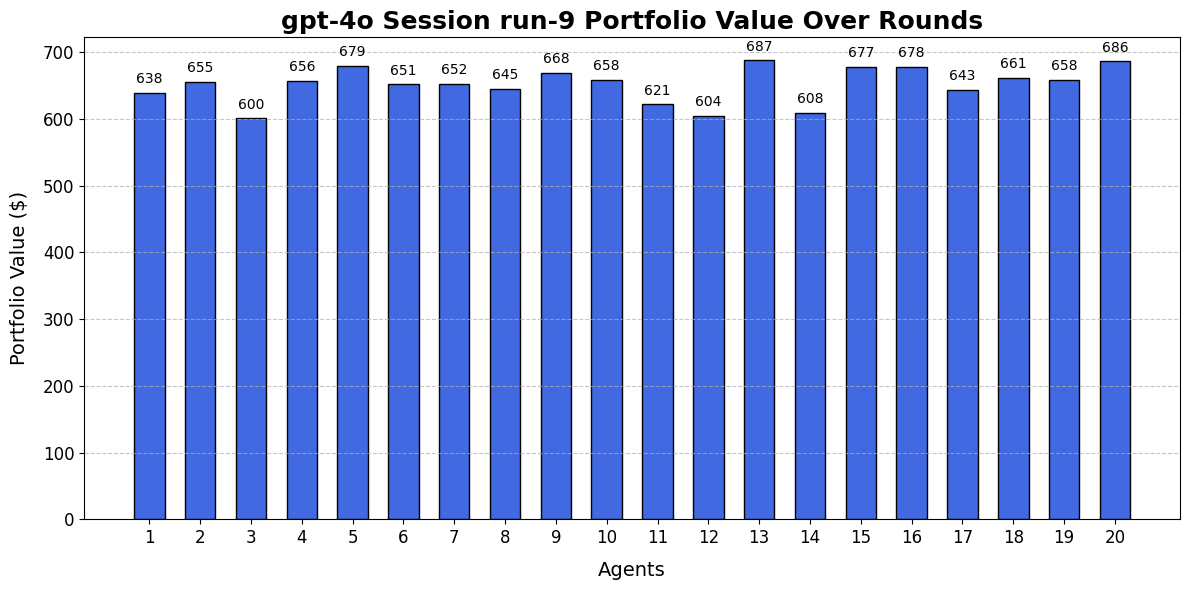

run-10
run-10
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/gpt-4o/graphs


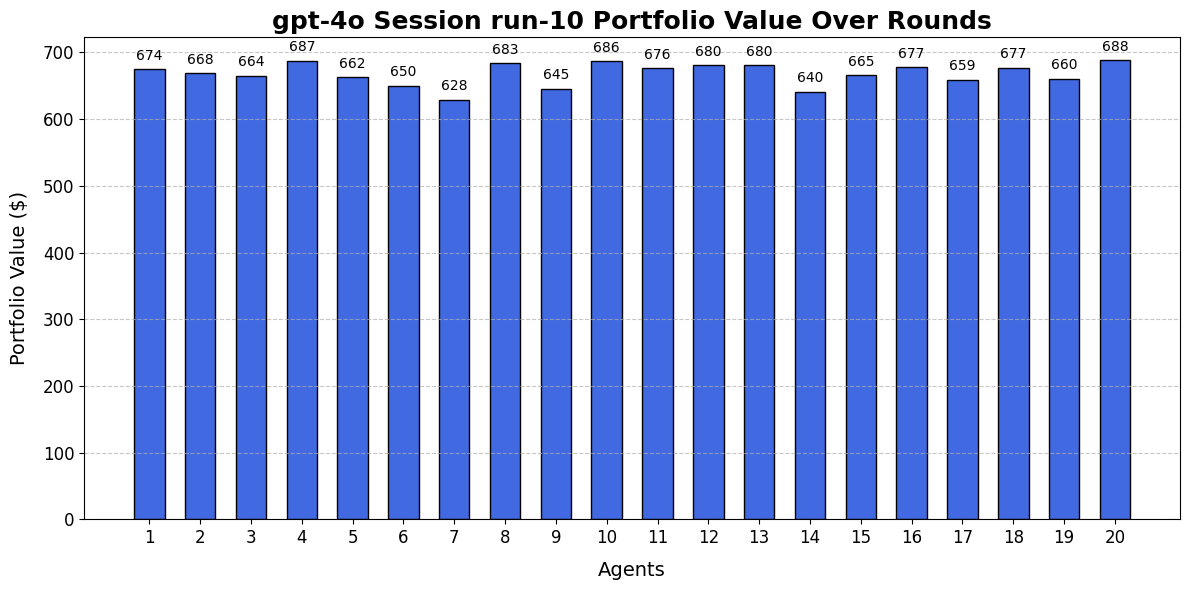

mistral-large
run-11
run-11
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/mistral-large/graphs


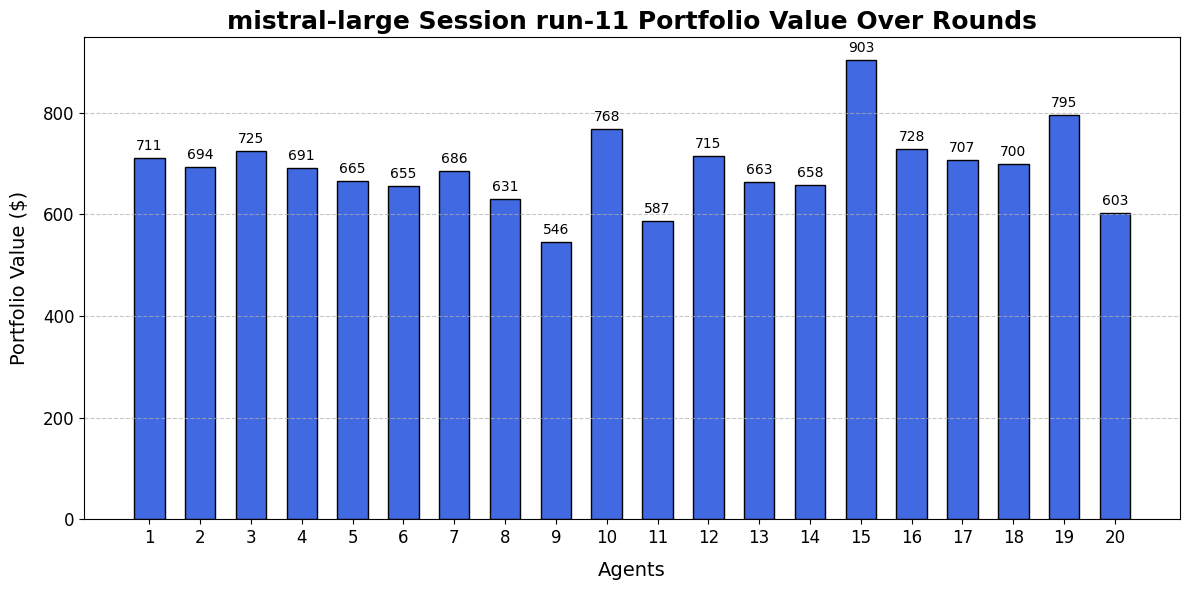

run-12
run-12
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/mistral-large/graphs


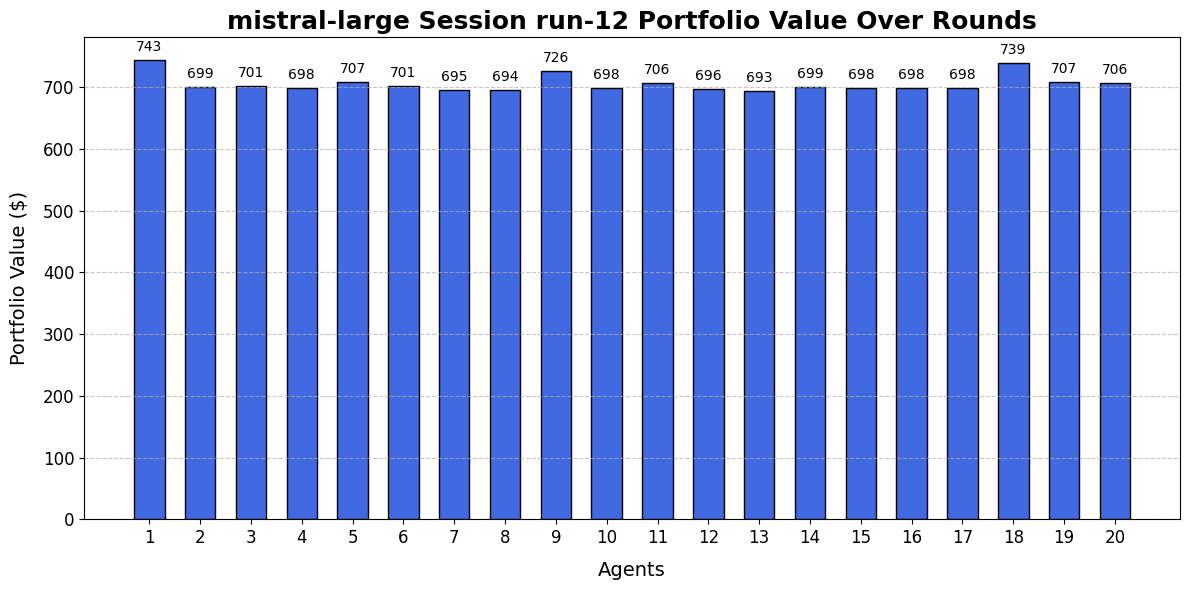

run-13
run-13
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/mistral-large/graphs


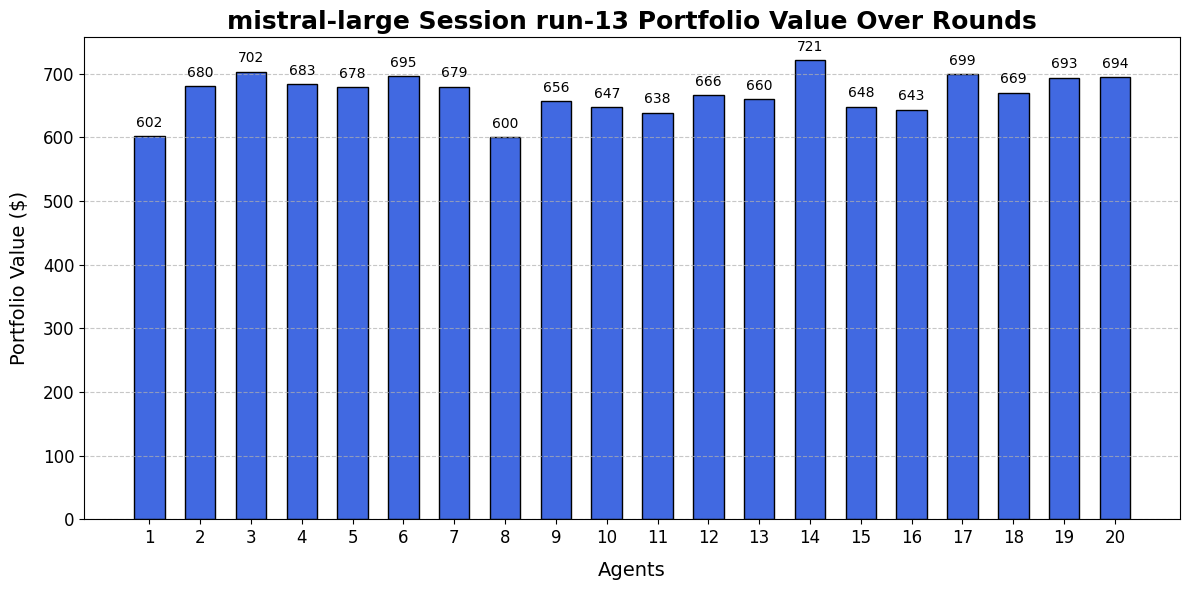

grok-2
run-14
run-14
Skipping session run-14 for model grok-2 due to an IndexError: list index out of range
run-15
run-15
Skipping session run-15 for model grok-2 due to an IndexError: list index out of range
run-16
run-16
Skipping session run-16 for model grok-2 due to missing 'Round 30'
run-17
run-17
Skipping session run-17 for model grok-2 due to missing 'Round 30'
run-18
run-18
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/grok-2/graphs


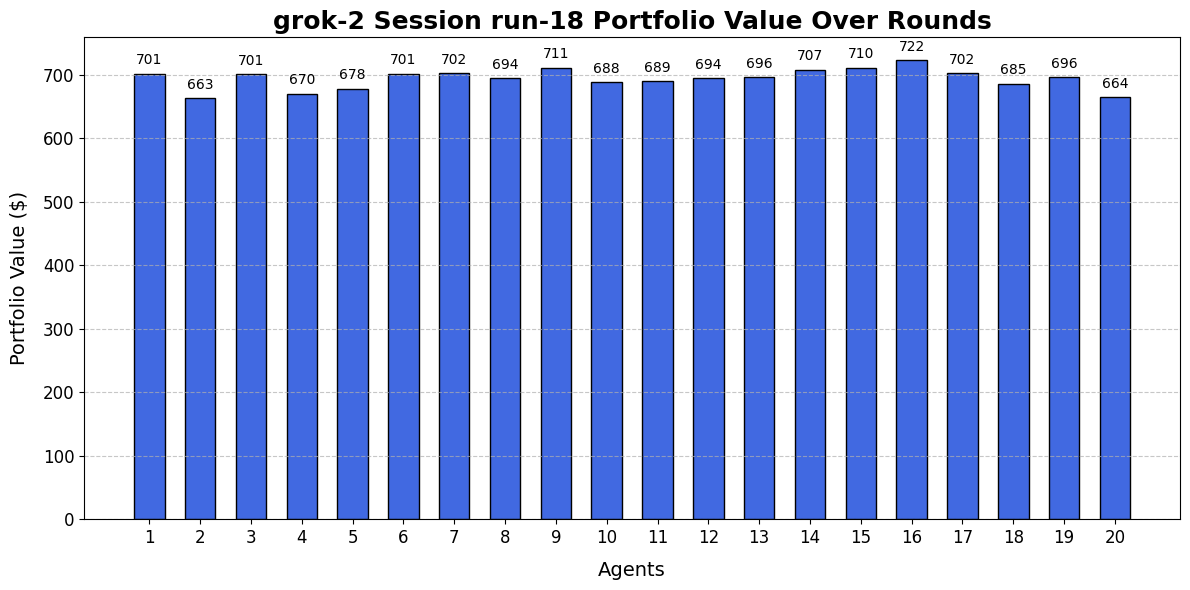

claude-3.5-sonnet
run-19
run-19
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/claude-3.5-sonnet/graphs


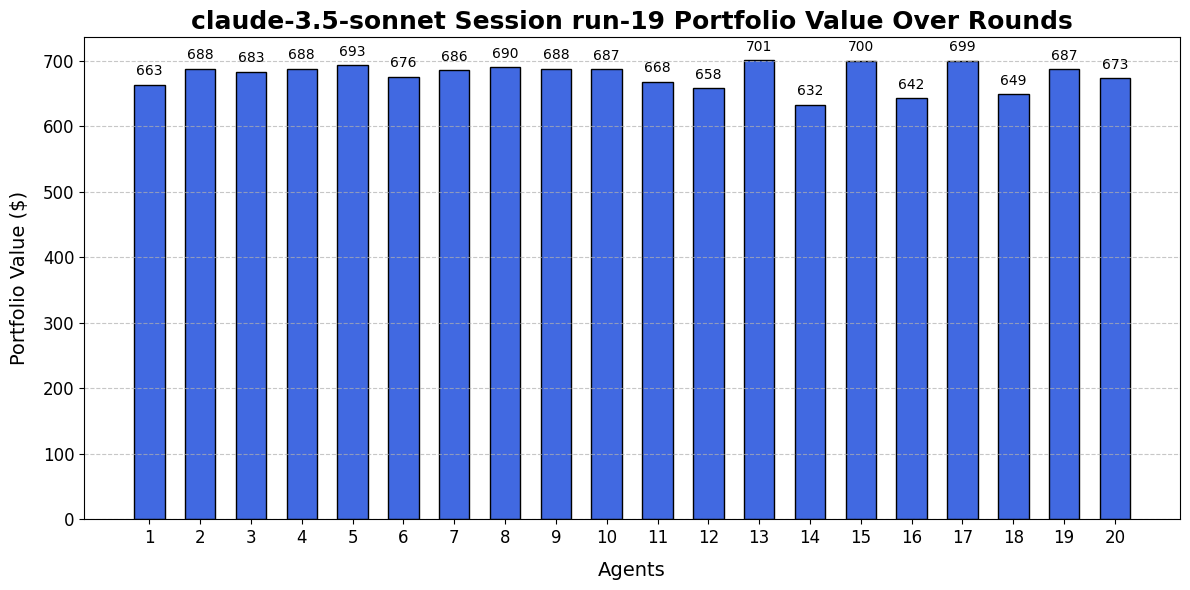

run-20
run-20
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/claude-3.5-sonnet/graphs


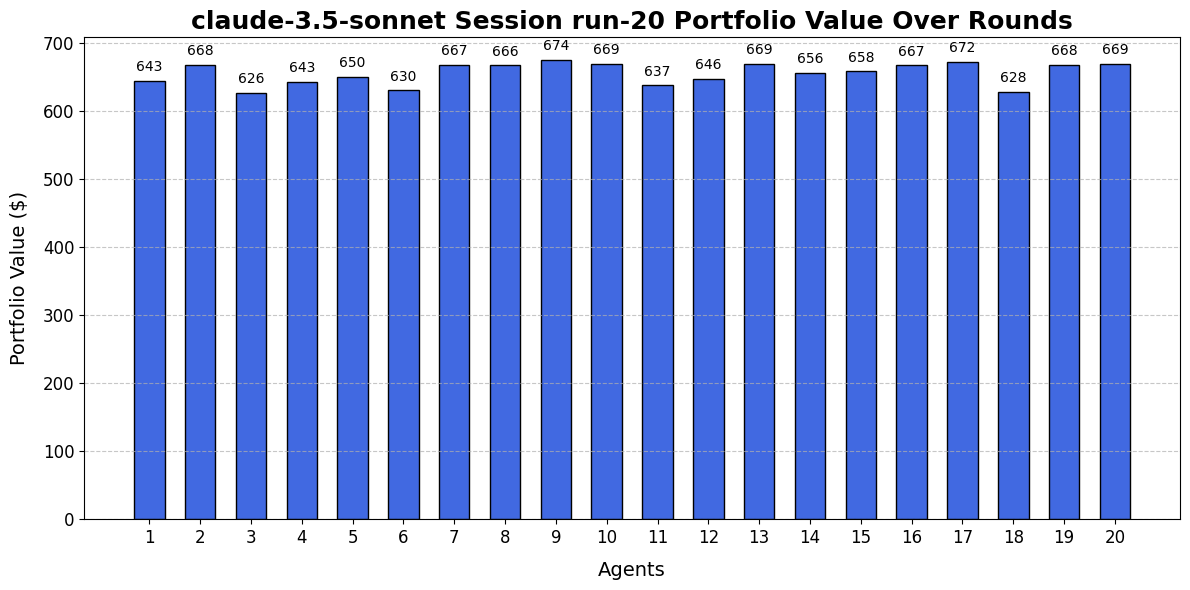

run-21
run-21
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/claude-3.5-sonnet/graphs


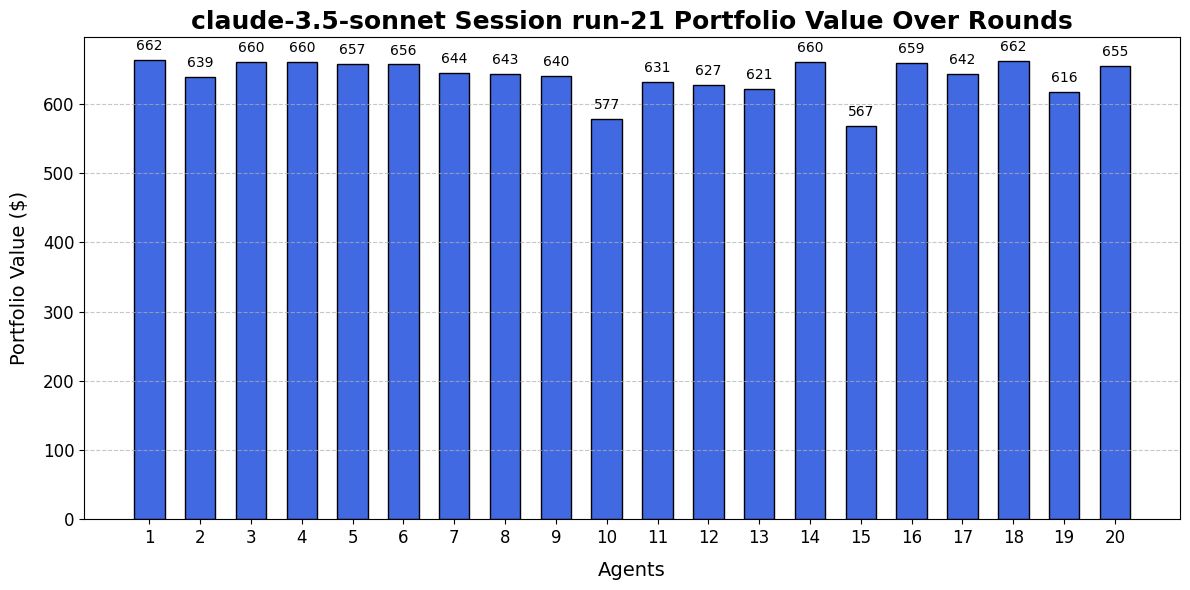

mixed
run-22
run-22
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/mixed/graphs


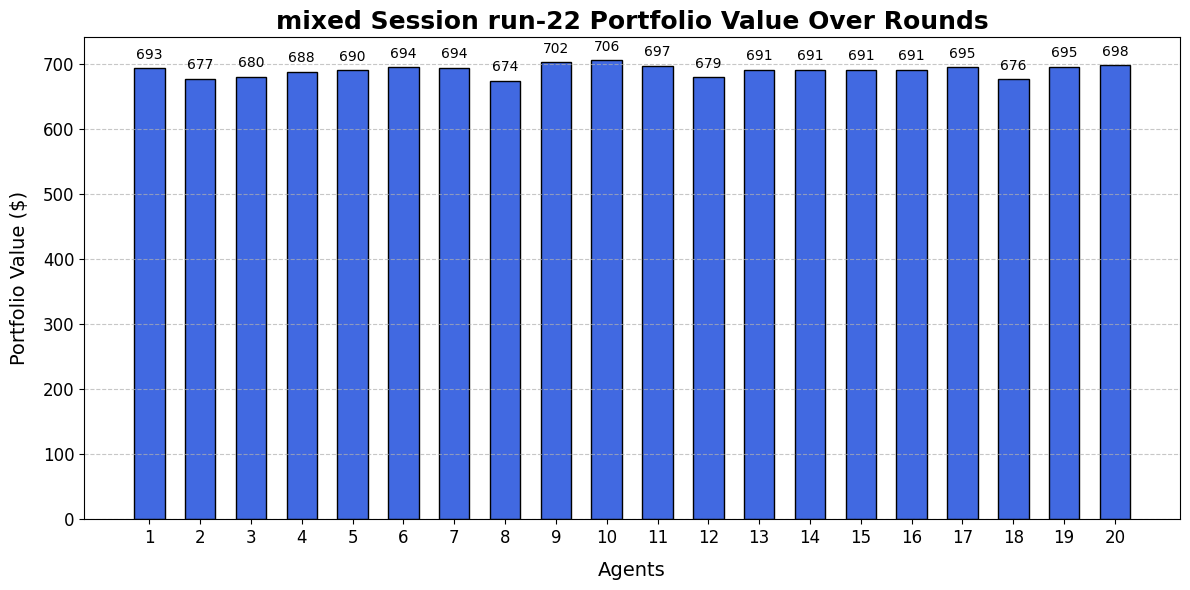

run-23
run-23
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/mixed/graphs


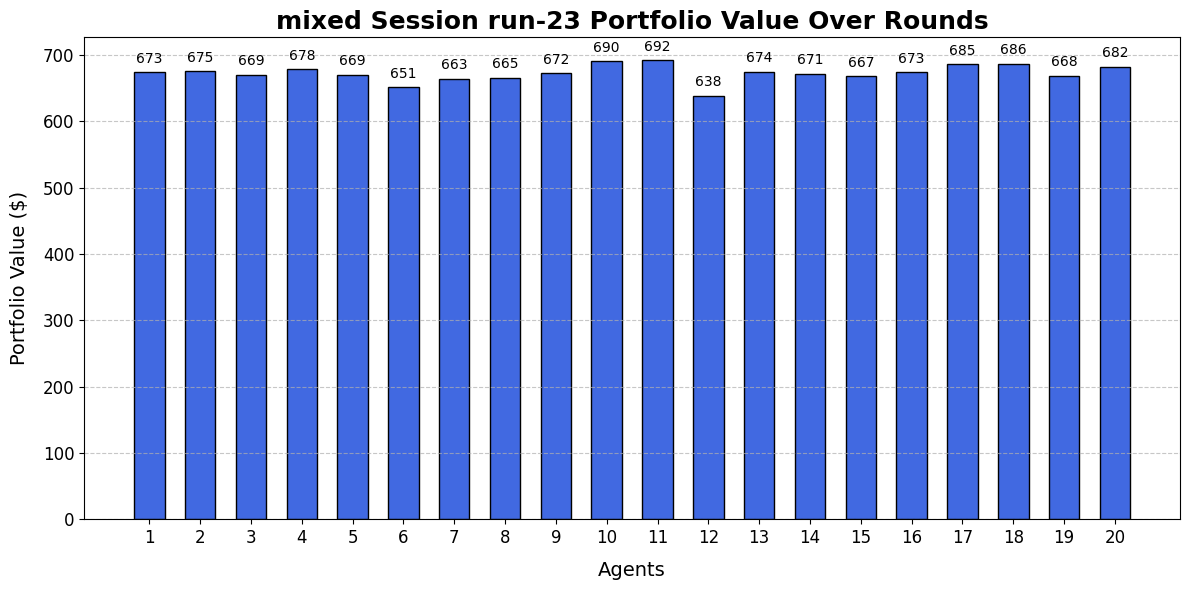

run-24
run-24
Image saved to  /Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs/mixed/graphs


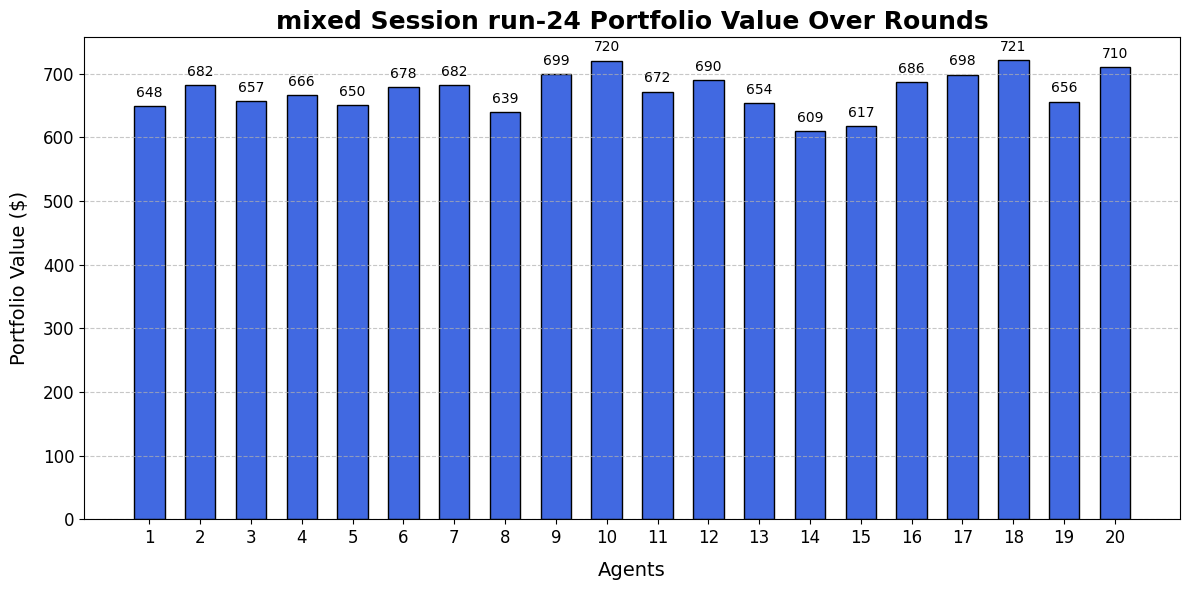

In [223]:
import numpy as np
def plot_final_port_val(session, model, port_val_list, dir_path):
    # Generate bar indices
    indices = list(range(1, len(port_val_list) + 1))

    # Plot the bar graph
    plt.figure(figsize=(12, 6))
    bars = plt.bar(indices, port_val_list, color='royalblue', width=0.6, edgecolor='black')

    # Add titles and labels
    plt.title(f"{model} Session {session} Portfolio Value Over Rounds", fontsize=18, fontweight='bold')
    plt.xlabel("Agents", fontsize=14, labelpad=10)
    plt.ylabel("Portfolio Value ($)", fontsize=14, labelpad=10)
    plt.xticks(indices, fontsize=12)
    plt.yticks(fontsize=12)

    # Add gridlines for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 10,
            f"{int(height)}",
            ha='center',
            va='bottom',
            fontsize=10
        )

    # Ensure output directory exists
    output_dir = fr"{dir_path}/{model}/graphs"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the plot
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.savefig(fr"{output_dir}/{model}_{session}_final_portfolio_values.png", dpi=300)
    print("Image saved to ", output_dir)
    plt.show()

dir_path = r"/Users/thenning/Documents/GitHub/LLM_Bubbles/bot-data/Graphs"
model_var = {}
for model in agent_runs_dict.keys():
    print(model)
    model_var[model] = []
    for session in agent_runs_dict[model].keys():
        print(session)
        try:
            # Load the data
            loaded_data = load_json_files(agent_runs_dict[model][session])
            
            # Calculate portfolio values
            port_val_list = calculate_port_val(loaded_data, 30, session)
            model_var[model].append((np.std(port_val_list)))
            
            # Plot the graph
            plot_final_port_val(session, model, port_val_list, dir_path)
        
        except KeyError as e:
            if str(e) == "'Round 30'":  # Check if the KeyError is specifically for 'Round 30'
                print(f"Skipping session {session} for model {model} due to missing 'Round 30'")
                continue  # Skip this session
            else:
                print(f"Skipping session {session} for model {model} due to a KeyError: {e}")
                continue
        
        except IndexError as e:
            print(f"Skipping session {session} for model {model} due to an IndexError: {e}")
            continue  # Skip this session
        
        except Exception as e:
            # Catch any other unexpected exceptions
            print(f"An unexpected error occurred for session {session} in model {model}: {e}")
            continue



In [226]:
model_var

{'gpt-3.5': [np.float64(28.61561032024305),
  np.float64(13.742362642573514),
  np.float64(31.326891818372268)],
 'gemini-1.5-pro': [np.float64(44.66655944607776),
  np.float64(61.662522692069615),
  np.float64(18.701979968709196)],
 'gpt-4o': [np.float64(6.876586998649853),
  np.float64(25.473742417438384),
  np.float64(16.332669989931226)],
 'mistral-large': [np.float64(74.98642540320215),
  np.float64(13.776855401360631),
  np.float64(30.92568283805549)],
 'grok-2': [np.float64(15.289901929051089)],
 'claude-3.5-sonnet': [np.float64(19.146314756370213),
  np.float64(15.668439576103285),
  np.float64(26.217647491718253)],
 'mixed': [np.float64(8.459127540710089),
  np.float64(12.246360877828154),
  np.float64(30.112432029811202)]}

In [227]:
for model in model_var.keys():
    print(f"Model: {model}")
    print(f"Portfolio Value variance is: {np.mean(model_var[model]):.2f}")


Model: gpt-3.5
Portfolio Value variance is: 24.56
Model: gemini-1.5-pro
Portfolio Value variance is: 41.68
Model: gpt-4o
Portfolio Value variance is: 16.23
Model: mistral-large
Portfolio Value variance is: 39.90
Model: grok-2
Portfolio Value variance is: 15.29
Model: claude-3.5-sonnet
Portfolio Value variance is: 20.34
Model: mixed
Portfolio Value variance is: 16.94


# Human only Markets

In [176]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [228]:
import pandas as pd
human_csv = pd.read_excel(r"/Users/thenning/Documents/GitHub/neurobubbles/econometrics/data_panel_4markets.xlsx", engine="openpyxl")
final_human_round = human_csv[human_csv['subsession.round_number'] == 33]
final_human_round

,participant.id_in_session,market_date,market_id,participant.label,participant.payoff,player.cash,player.shares,stock_value,CashValue_StockValue_ratio,player.shares_transacted,...,player.forecast_reward,player.dose_r,player.dose_mu,group.price,group.volume,group.dividend,group.float,subsession.round_number,session.code,log_returns
672,1,03_07_2024,1,65d942ce4ea2fe978c283416,0,613.01,0,0,0,0,...,0,0.989962,3.538664,19,6,0.4,84,33,8h0lckuw,-0.233615
673,2,03_07_2024,1,5d453e8723a5bb0001492546,0,1767.23,0,0,0,0,...,5,0.912584,3.195616,19,6,0.4,84,33,8h0lckuw,-0.233615
674,3,03_07_2024,1,5ed543442db0060a955d12e1,0,167.01,10,1670.1,0.1,0,...,0,0.912584,3.195616,19,6,0.4,84,33,8h0lckuw,-0.233615
675,4,03_07_2024,1,46Y,0,1456.08,0,0,0,0,...,0,0.788694,2.273358,19,6,0.4,84,33,8h0lckuw,-0.233615
676,5,03_07_2024,1,5d012930cfeb82001817c9c9,0,291.97,1,291.97,1,-1,...,0,-0.431586,3.001438,19,6,0.4,84,33,8h0lckuw,-0.233615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,19,06_04_2024,4,664299802cd8985e29fc6573,1059.42,699.45,0,NaN,NaN,0,...,2.5,0.989962,3.538664,38,5,0.4,88,33,3olyo3ti,-0.051293
2604,20,06_04_2024,4,vbm55dq7_92P,971.12,649.54,4,NaN,NaN,2,...,2.5,0.989962,3.538664,38,5,0.4,88,33,3olyo3ti,-0.051293
2605,21,06_04_2024,4,6638e8aa3d1f38846080806a,991.57,649.69,1,NaN,NaN,0,...,0,1.186838,3.452692,38,5,0.4,88,33,3olyo3ti,-0.051293
2606,22,06_04_2024,4,vbm55dq7_60Q,1213.41,858.01,0,NaN,NaN,0,...,2.5,1.186838,3.452692,38,5,0.4,88,33,3olyo3ti,-0.051293


In [229]:
market_ids = np.unique(final_human_round['market_id'])
market_ids

array([1, 2, 3, 4], dtype=object)

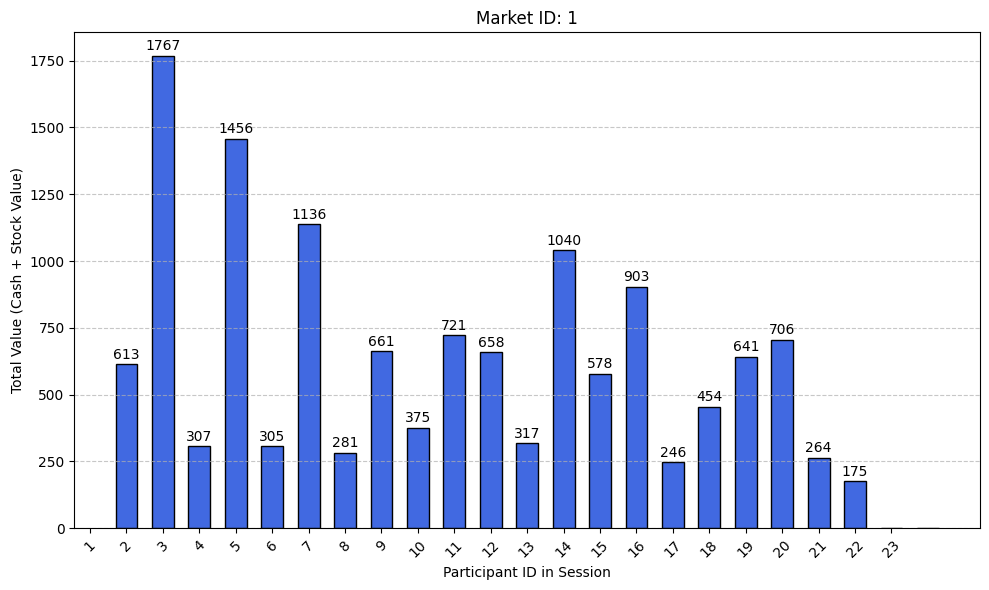

430.6862277495728


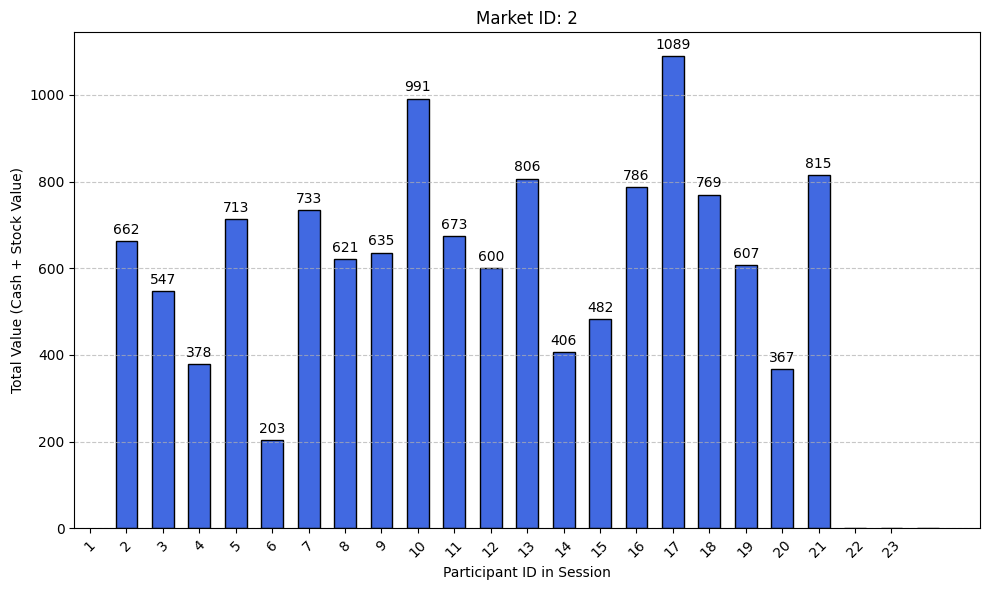

290.8659491515007


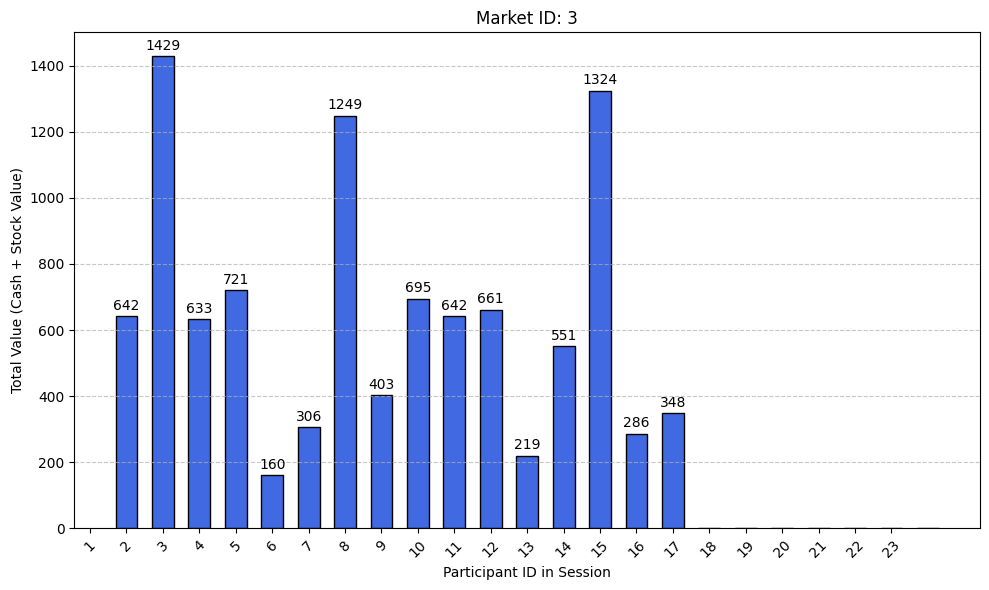

431.1090148672502


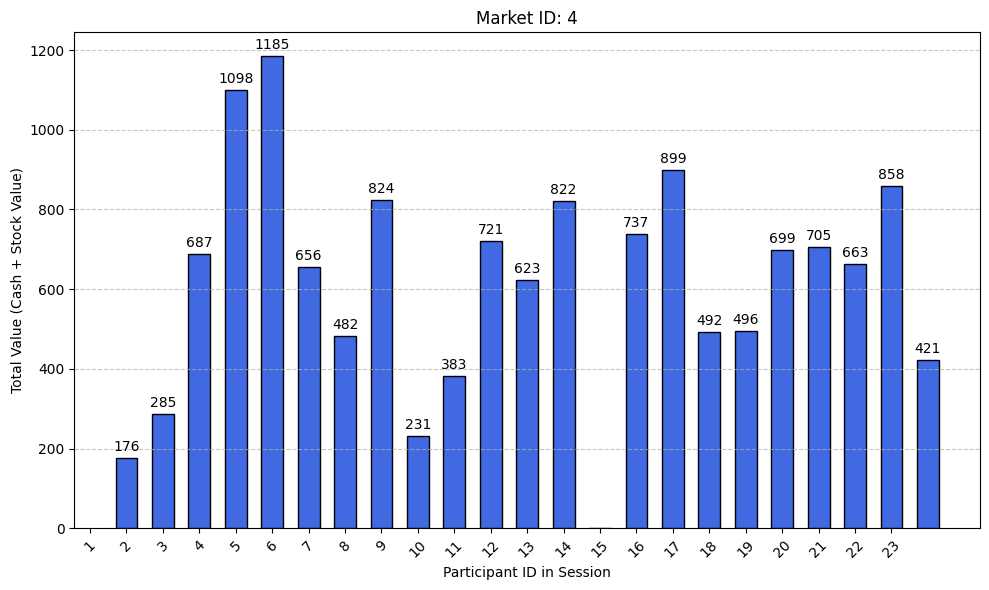

279.8045272546742


In [234]:
import matplotlib.pyplot as plt

# Get the unique list of all participant IDs
all_participants = final_human_round['participant.id_in_session'].unique()

var = []
for market in market_ids:
    # Filter data for the current market
    market_data = final_human_round[final_human_round['market_id'] == market]
    
    # Check if there is data for this market
    if market_data.empty:
        print(f"No data for market_id: {market}")
        continue
    
    # Create a mapping of participant IDs to their total value
    participant_values = dict(zip(
        market_data['participant.id_in_session'],
        market_data['player.cash'] + market_data['player.shares'] * 14
    ))
    
    # Ensure all participants are represented, with 0 for missing ones
    values = [participant_values.get(pid, 0) for pid in all_participants]
    
    # Bar plot
    plt.figure(figsize=(10, 6))
    
    # Plot bars and get the bar container
    bars = plt.bar(all_participants, values, color='royalblue', width=0.6, edgecolor='black')
    
    # Add gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only annotate if the bar height is greater than 0
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 10,
                f"{int(height)}",
                ha='center',
                va='bottom',
                fontsize=10
            )
    
    # Add labels and title
    plt.xlabel('Participant ID in Session')
    plt.ylabel('Total Value (Cash + Stock Value)')
    plt.title(f'Market ID: {market}')
    
    # Adjust x-ticks to show participant IDs
    plt.xticks(ticks=range(len(all_participants)), labels=all_participants, rotation=45)
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

    print(np.std(values))
    var.append(np.std(values))


In [236]:
np.mean(var)

np.float64(358.1164297557495)

In [233]:
import matplotlib.pyplot as plt

# Adjust Matplotlib styling for a "paper-worthy" format
plt.style.use('seaborn-muted')  # Use a clean and muted style for academic plots
plt.rcParams.update({
    "font.size": 14,            # Increase font size for clarity
    "axes.titlesize": 18,       # Larger title font
    "axes.labelsize": 16,       # Larger axis labels
    "xtick.labelsize": 12,      # Smaller x-tick labels
    "ytick.labelsize": 12,      # Smaller y-tick labels
    "legend.fontsize": 12,      # Legend font size
    "axes.grid": True,          # Enable grid
    "grid.alpha": 0.6,          # Make grid lines subtler
    "grid.linestyle": "--"      # Dashed grid lines
})

# Bar plot
plt.figure(figsize=(12, 8))
plt.bar(all_participants, values, color='steelblue', edgecolor='black')

# Titles and labels
plt.title("claude-3.5-sonnet Session run-20 Portfolio Value Over Rounds", fontsize=18, fontweight='bold')
plt.xlabel("Agents", fontsize=16)
plt.ylabel("Portfolio Value ($)", fontsize=16)

# Annotations (portfolio values above bars)
for i, value in enumerate(values):
    plt.text(all_participants[i], value + 5, str(value), ha='center', va='bottom', fontsize=12)

# Adjust x-axis ticks
plt.xticks(ticks=range(1, len(all_participants) + 1), labels=all_participants, rotation=0)

# Tight layout and save the figure
plt.tight_layout()
plt.savefig("formatted_plot.png", dpi=300)  # Save as high-resolution image
plt.show()


OSError: 'seaborn-muted' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)